# Polybaric PyMELTScalc SCSS calcs
- This notebook can perform MELTS calculations, and then go onto calculate the SCSS and SCAS within a single notebook!
- It relies on the python MELTS architecture developed by Paula Antoshechkin at Caltech, and fractional crystallization functions written by Matthew Gleeson at UC Berkeley
- In addition to installing PySulfSat you will need to first download the MELTS python infrastructure from this website (https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/), and then the PyMELTScalc code by uncommenting below
- More information can be found here: https://github.com/gleesonm1/pyMELTScalc
You can download the excel spreadsheet with the compositions here:
- https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Integrating_with_PyMELTS/Glass_input_example.xlsx

## If you havent done so already, you need to pip install PySulfSat
- Do this by removing the #. You only need to do this once per computer. After your initial installation, you will want to upgrade instead using the second command


In [65]:
#!pip install PySulfSat
#!pip install PySulfSat --upgrade

## Now you need to append the path to your local MELTS installation

In [66]:
import sys
sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')

## And now you need to download the PyMELTScalc code by uncommenting this line

In [67]:
#!pip install --upgrade "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.7.zip"

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
import pyMELTScalc as M

In [69]:
ss.__version__

'0.0.5dev'

In [70]:
M.__version__

'0.0.7'

## Import data
- Here, we load in some glass EPMA data, and then start a MELTS model from the first row in the loaded spreadsheet

In [71]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq", sample_label='Sample_ID_Liq')
df_out2.head()
# Selecting a single composition to start the model from
sample=df_out2.iloc[0].copy()
sample['H2O_Liq']=0.5
sample['CO2_Liq']=0.1

We have replaced all missing liquid oxides and strings with zeros. 


## Running at four different pressures

In [73]:

MELTS_FC_Multip=M.multi_iso_crystallise(Model = "MELTSv1.0.2", 
                        Fe3Fet_Liq=0.1,
                        comp = sample.to_dict(), 
                        Frac_solid = True, 
                        Frac_fluid = True, 
                        find_liquidus = True,
                        T_end_C = 1000, 
                        dt_C = 5, 
                        P_path_bar = np.array([1000, 3000, 5000, 7000]))

In [74]:
MELTS_1000bar=MELTS_FC_Multip['P = 1000 bars']['All']
MELTS_3000bar=MELTS_FC_Multip['P = 3000 bars']['All']
MELTS_5000bar=MELTS_FC_Multip['P = 5000 bars']['All']
MELTS_7000bar=MELTS_FC_Multip['P = 7000 bars']['All']

In [75]:
LiZhang22_1000bars=ss.calculate_LZ2022_SCSS(df=MELTS_1000bar, T_K=MELTS_1000bar['T_C']+273.15, P_kbar=1, 
H2O_Liq=MELTS_1000bar['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_1000bar['Fe3Fet_Liq'])
LiZhang22_3000bars=ss.calculate_LZ2022_SCSS(df=MELTS_3000bar, T_K=MELTS_3000bar['T_C']+273.15, P_kbar=3, 
H2O_Liq=MELTS_3000bar['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_3000bar['Fe3Fet_Liq'])
LiZhang22_5000bars=ss.calculate_LZ2022_SCSS(df=MELTS_5000bar, T_K=MELTS_5000bar['T_C']+273.15, P_kbar=5, 
H2O_Liq=MELTS_5000bar['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_5000bar['Fe3Fet_Liq'])
LiZhang22_7000bars=ss.calculate_LZ2022_SCSS(df=MELTS_7000bar, T_K=MELTS_7000bar['T_C']+273.15, P_kbar=7, 
H2O_Liq=MELTS_7000bar['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_7000bar['Fe3Fet_Liq'])

replacing Fe3Fet_Liq in the original dataframe with that input into the function
replacing Fe3Fet_Liq in the original dataframe with that input into the function
replacing Fe3Fet_Liq in the original dataframe with that input into the function
replacing Fe3Fet_Liq in the original dataframe with that input into the function


In [76]:
S2017_1000bars=ss.calculate_S2017_SCSS(df=MELTS_1000bar, T_K=MELTS_1000bar['T_C']+273.15, P_kbar=1, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_1000bar['Fe3Fet_Liq'])
S2017_3000bars=ss.calculate_S2017_SCSS(df=MELTS_3000bar, T_K=MELTS_3000bar['T_C']+273.15, P_kbar=3, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_3000bar['Fe3Fet_Liq'])
S2017_5000bars=ss.calculate_S2017_SCSS(df=MELTS_5000bar, T_K=MELTS_5000bar['T_C']+273.15, P_kbar=5, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_5000bar['Fe3Fet_Liq'])
S2017_7000bars=ss.calculate_S2017_SCSS(df=MELTS_7000bar, T_K=MELTS_7000bar['T_C']+273.15, P_kbar=7, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_7000bar['Fe3Fet_Liq'])


Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS
Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS
Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS
Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


In [77]:
O2021_1000bars=ss.calculate_O2021_SCSS(df=MELTS_1000bar, T_K=MELTS_1000bar['T_C']+273.15, P_kbar=1, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_1000bar['Fe3Fet_Liq'])
O2021_3000bars=ss.calculate_O2021_SCSS(df=MELTS_3000bar, T_K=MELTS_3000bar['T_C']+273.15, P_kbar=3, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_3000bar['Fe3Fet_Liq'])
O2021_5000bars=ss.calculate_O2021_SCSS(df=MELTS_5000bar, T_K=MELTS_5000bar['T_C']+273.15, P_kbar=5, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_5000bar['Fe3Fet_Liq'])
O2021_7000bars=ss.calculate_O2021_SCSS(df=MELTS_7000bar, T_K=MELTS_7000bar['T_C']+273.15, P_kbar=7, 
 Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS_7000bar['Fe3Fet_Liq'])


Using inputted Fe_FeNiCu_Sulf ratio for calculations.
Using inputted Fe_FeNiCu_Sulf ratio for calculations.
Using inputted Fe_FeNiCu_Sulf ratio for calculations.
Using inputted Fe_FeNiCu_Sulf ratio for calculations.


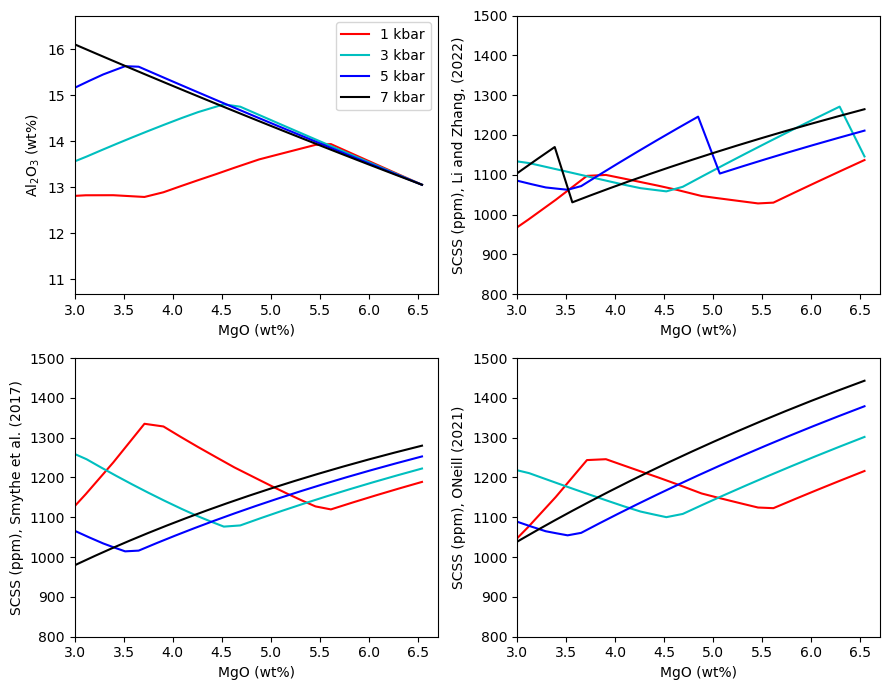

In [83]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,7)) #3.5,9
ax1.plot(MELTS_1000bar['MgO_Liq'], MELTS_1000bar['Al2O3_Liq'], '-r', label='1 kbar')
ax1.plot(MELTS_3000bar['MgO_Liq'], MELTS_3000bar['Al2O3_Liq'], '-c', label='3 kbar')
ax1.plot(MELTS_5000bar['MgO_Liq'], MELTS_5000bar['Al2O3_Liq'], '-b', label='5 kbar')
ax1.plot(MELTS_7000bar['MgO_Liq'], MELTS_7000bar['Al2O3_Liq'], '-k', label='7 kbar')

ax1.legend()

ax2.plot(MELTS_1000bar['MgO_Liq'], LiZhang22_1000bars['SCSS_Tot'], '-r')
ax2.plot(MELTS_3000bar['MgO_Liq'], LiZhang22_3000bars['SCSS_Tot'], '-c')
ax2.plot(MELTS_5000bar['MgO_Liq'], LiZhang22_5000bars['SCSS_Tot'], '-b')
ax2.plot(MELTS_7000bar['MgO_Liq'], LiZhang22_7000bars['SCSS_Tot'], '-k')


ax3.plot(MELTS_1000bar['MgO_Liq'], S2017_1000bars['SCSS_ideal_ppm_Smythe2017'], '-r')
ax3.plot(MELTS_3000bar['MgO_Liq'], S2017_3000bars['SCSS_ideal_ppm_Smythe2017'], '-c')
ax3.plot(MELTS_5000bar['MgO_Liq'], S2017_5000bars['SCSS_ideal_ppm_Smythe2017'], '-b')
ax3.plot(MELTS_7000bar['MgO_Liq'], S2017_7000bars['SCSS_ideal_ppm_Smythe2017'], '-k')

#ax3.set_ylim([0, 6000])
ax4.plot(MELTS_1000bar['MgO_Liq'], O2021_1000bars['SCSS2_ppm'], '-r')
ax4.plot(MELTS_3000bar['MgO_Liq'], O2021_3000bars['SCSS2_ppm'], '-c')
ax4.plot(MELTS_5000bar['MgO_Liq'], O2021_5000bars['SCSS2_ppm'], '-b')
ax4.plot(MELTS_7000bar['MgO_Liq'], O2021_7000bars['SCSS2_ppm'], '-k')


ax1.set_ylabel('Al$_2$O$_3$ (wt%)')
ax1.set_xlabel('MgO (wt%)')
ax2.set_xlabel('MgO (wt%)')
ax3.set_xlabel('MgO (wt%)')
ax4.set_xlabel('MgO (wt%)')
ax2.set_ylabel('SCSS (ppm), Li and Zhang, (2022)')
ax3.set_ylabel('SCSS (ppm), Smythe et al. (2017)')
ax4.set_ylabel('SCSS (ppm), ONeill (2021)')
ax1.set_xlim([3, 6.7])
ax2.set_xlim([3, 6.7])
ax3.set_xlim([3, 6.7])
ax4.set_xlim([3, 6.7])
ax2.set_ylim([800, 1500])
ax3.set_ylim([800, 1500])
ax4.set_ylim([800, 1500])
fig.tight_layout()
fig.savefig('Polybaric_SCSS.png', dpi=300)